# Shopper Spectrum
Customer Segmentation and Product Recommendation in E-Commerce

Labmentix Project



In [1]:
import pandas as pd


In [2]:
df = pd.read_excel("../data/Online Retail.xlsx")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape


(541909, 8)

In [4]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df["Country"].value_counts().head(10)


Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64

In [6]:
df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)



Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

In [7]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


C:\Users\ACER\AppData\Local\Temp\ipykernel_13788\220721973.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("InvoiceDate").resample("M")["InvoiceNo"].count().plot(


<Axes: title={'center': 'Monthly Transaction Count'}, xlabel='InvoiceDate'>

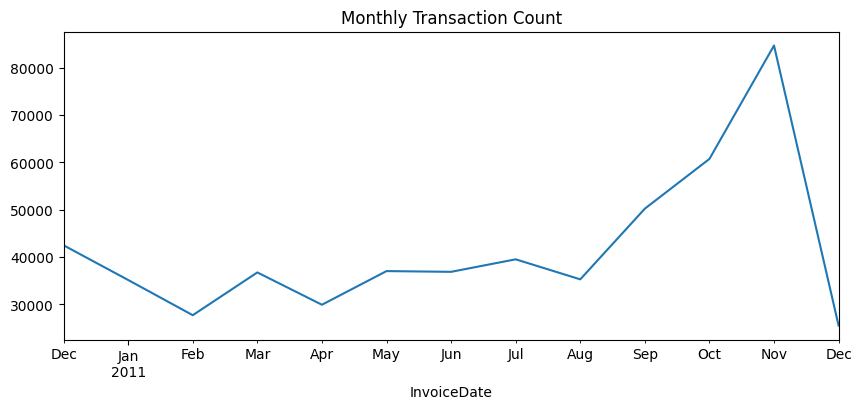

In [8]:
df.set_index("InvoiceDate").resample("M")["InvoiceNo"].count().plot(
    title="Monthly Transaction Count",
    figsize=(10,4)
)


In [9]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]


In [11]:
df.columns



Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [12]:
df["TotalPrice"].describe()


count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

In [13]:
import pandas as pd

reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
reference_date


Timestamp('2011-12-10 12:50:00')

In [14]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [15]:
rfm.describe()


,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,92.047118,5.075480,1898.459701
std,100.765435,9.338754,8219.345141
min,1.000000,1.000000,-4287.630000
25%,17.000000,1.000000,293.362500
50%,50.000000,3.000000,648.075000
75%,143.000000,5.000000,1611.725000
max,374.000000,248.000000,279489.020000


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [17]:
rfm_scaled.shape


(4372, 3)

In [18]:
import sys
sys.executable


'c:\\Users\\ACER\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

In [19]:
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


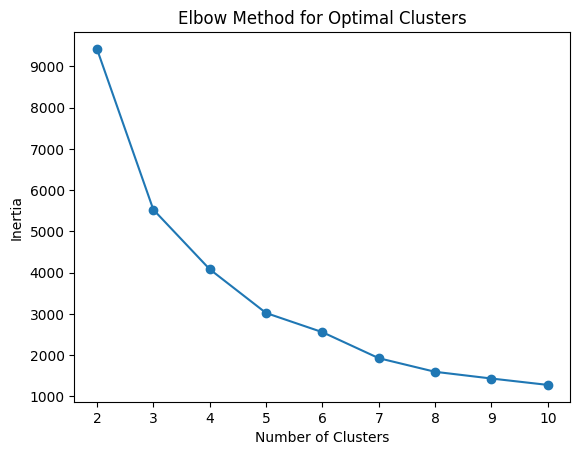

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,7,4310.00,3
12348.0,75,4,1797.24,3
12349.0,19,1,1757.55,3
12350.0,310,1,334.40,1


In [24]:
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,10.752577,28.510309,12168.264691
1,248.927577,1.805942,455.110716
2,5.090909,109.909091,124312.306364
3,42.780906,4.370550,1320.981506


In [25]:
cluster_map = {
    2: 'High-Value',
    0: 'Regular',
    3: 'Occasional',
    1: 'At-Risk'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_map)

rfm[['Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment']].head()


,Recency,Frequency,Monetary,Cluster,Segment
CustomerID,,,,,
12346.0,326,2,0.00,1,At-Risk
12347.0,2,7,4310.00,3,Occasional
12348.0,75,4,1797.24,3,Occasional
12349.0,19,1,1757.55,3,Occasional
12350.0,310,1,334.40,1,At-Risk


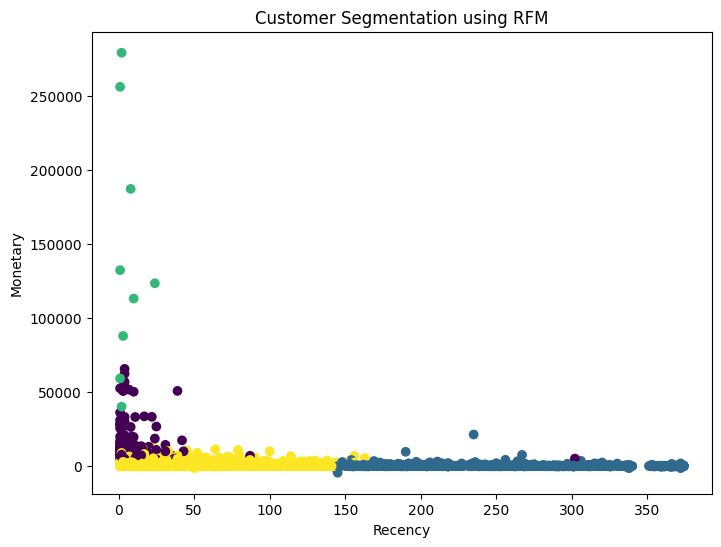

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    rfm['Recency'],
    rfm['Monetary'],
    c=rfm['Cluster'],
    cmap='viridis'
)
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.title("Customer Segmentation using RFM")
plt.show()


In [27]:
import pickle
import os

os.makedirs("models", exist_ok=True)

pickle.dump(kmeans, open("models/kmeans_model.pkl", "wb"))
pickle.dump(scaler, open("models/scaler.pkl", "wb"))


In [28]:
# Keep only required columns
rec_df = df[['CustomerID', 'Description', 'Quantity']]

# Remove missing product names
rec_df = rec_df.dropna(subset=['Description'])

rec_df.head()


,CustomerID,Description,Quantity
0,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,6
1,17850.0,WHITE METAL LANTERN,6
2,17850.0,CREAM CUPID HEARTS COAT HANGER,8
3,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,17850.0,RED WOOLLY HOTTIE WHITE HEART.,6


In [29]:
product_matrix = rec_df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum'
)

# Replace NaN with 0
product_matrix = product_matrix.fillna(0)

product_matrix.shape


(4372, 3896)

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

product_similarity = cosine_similarity(product_matrix.T)

product_similarity_df = pd.DataFrame(
    product_similarity,
    index=product_matrix.columns,
    columns=product_matrix.columns
)

product_similarity_df.head()


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1.000000,0.000000,0.000000,0.000227,0.000000,0.000000,0.020530,0.000000,0.000262,0.063503,...,0.0,0.001368,0.015958,0.001770,0.0,0.002864,0.0,0.013142,0.000000,0.002594
50'S CHRISTMAS GIFT BAG LARGE,0.000000,1.000000,0.003534,0.004001,0.000000,0.020036,0.027947,0.900955,0.119061,0.013404,...,0.0,0.001719,0.015645,0.018056,0.0,0.015814,0.0,0.011251,0.000000,0.029797
DOLLY GIRL BEAKER,0.000000,0.003534,1.000000,0.870882,0.980596,0.006296,0.005238,0.003034,0.001765,0.412043,...,0.0,0.000043,0.002882,0.345358,0.0,0.529290,0.0,0.823822,0.000097,0.006666
I LOVE LONDON MINI BACKPACK,0.000227,0.004001,0.870882,1.000000,0.883883,0.019879,0.004113,0.004043,0.008271,0.382704,...,0.0,0.001409,0.004216,0.310396,0.0,0.474777,0.0,0.749980,0.000000,0.010393
I LOVE LONDON MINI RUCKSACK,0.000000,0.000000,0.980596,0.883883,1.000000,0.000000,0.000000,0.000000,0.000000,0.411274,...,0.0,0.000000,0.000000,0.347445,0.0,0.534280,0.0,0.838031,0.000000,0.000000


In [31]:
def recommend_products(product_name, top_n=5):
    if product_name not in product_similarity_df.columns:
        return "Product not found"

    similar_scores = product_similarity_df[product_name].sort_values(ascending=False)
    recommendations = similar_scores[1:top_n+1].index.tolist()

    return recommendations


In [32]:
recommend_products("WHITE HANGING HEART T-LIGHT HOLDER")


['RED HANGING HEART T-LIGHT HOLDER',
 'WASHROOM METAL SIGN',
 'LAUNDRY 15C METAL SIGN',
 'GREEN VINTAGE SPOT BEAKER',
 'BLUE VINTAGE SPOT BEAKER']

In [33]:
import pickle
pickle.dump(product_similarity_df, open("models/product_similarity.pkl", "wb"))


In [34]:
[r for r in globals() if 'rfm' in r.lower()]


['rfm', 'rfm_scaled']

In [35]:
['Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment']


['Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment']

In [36]:
for var, val in list(globals().items()):
    if hasattr(val, "columns"):
        cols = set(val.columns)
        if {'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment'}.issubset(cols):
            print("FINAL DATAFRAME NAME:", var)


FINAL DATAFRAME NAME: rfm
FINAL DATAFRAME NAME: _25


In [37]:
rfm.to_csv("customer_segments.csv")


In [38]:
customer_segments = rfm
customer_segments.to_csv("customer_segments.csv")


In [39]:
rfm.to_csv("customer_segments.csv")
